# Data Analysis
---

### Import Libraries

In [15]:
import os
import warnings
import operator 

import datetime as dt

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 

from importlib import reload

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 180

### Retrieve Data

In [16]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)

In [17]:
print('List of stocks: ', end = ' ')
for i in stocks.keys():
    print(i.upper(), end=' ')

List of stocks:  AMZN MSFT FB TSLA GOOGL GOOG AAPL 

### Ticker

In [29]:
ticker = 'amzn'

In [30]:
stocks[ticker.lower()].tail()

,High,Low,Open,Close,Volume,Adj Close,Return,Change,Volatility,MA7,MA21,Momentum,RSI,MACD,Signal,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,
2022-03-22,3323.340088,3233.97998,3236.110107,3297.780029,3204300.0,3297.780029,0.019,67.949951,193.711470,3106.267194,2993.095273,3141.780029,63.854142,36.912212,-14.766764,3302.404049,2683.786497
2022-03-23,3327.399902,3253.73999,3274.100098,3268.159912,2790600.0,3268.159912,-0.002,-29.620117,193.981791,3167.852888,3005.676700,3222.010010,61.858336,49.189749,-1.975462,3337.513463,2673.839936
2022-03-24,3282.370117,3201.00000,3274.989990,3272.989990,2839900.0,3272.989990,-0.001,4.830078,194.040865,3214.375732,3023.602888,3226.830078,62.066547,58.633639,10.146358,3370.986094,2676.219681
2022-03-25,3307.370117,3245.00000,3280.000000,3295.469971,2451600.0,3295.469971,0.005,22.479980,194.727435,3247.717146,3036.379557,3294.780029,63.076799,67.157784,21.548644,3403.488917,2669.270197
2022-03-28,3380.750000,3298.00000,3299.500000,3379.810059,2861809.0,3379.810059,0.024,84.340088,199.557501,3281.292864,3050.857654,3265.159912,66.663911,79.798898,33.198695,3447.301191,2654.414117


---
# Check for Correlation
---

In [31]:
stocks[ticker].corr()[['Return']].sort_values(by='Return', ascending=False)[:5]

,Return
Return,1.000000
RSI,0.239800
Change,0.238118
Volume,0.131043
MACD,-0.000965


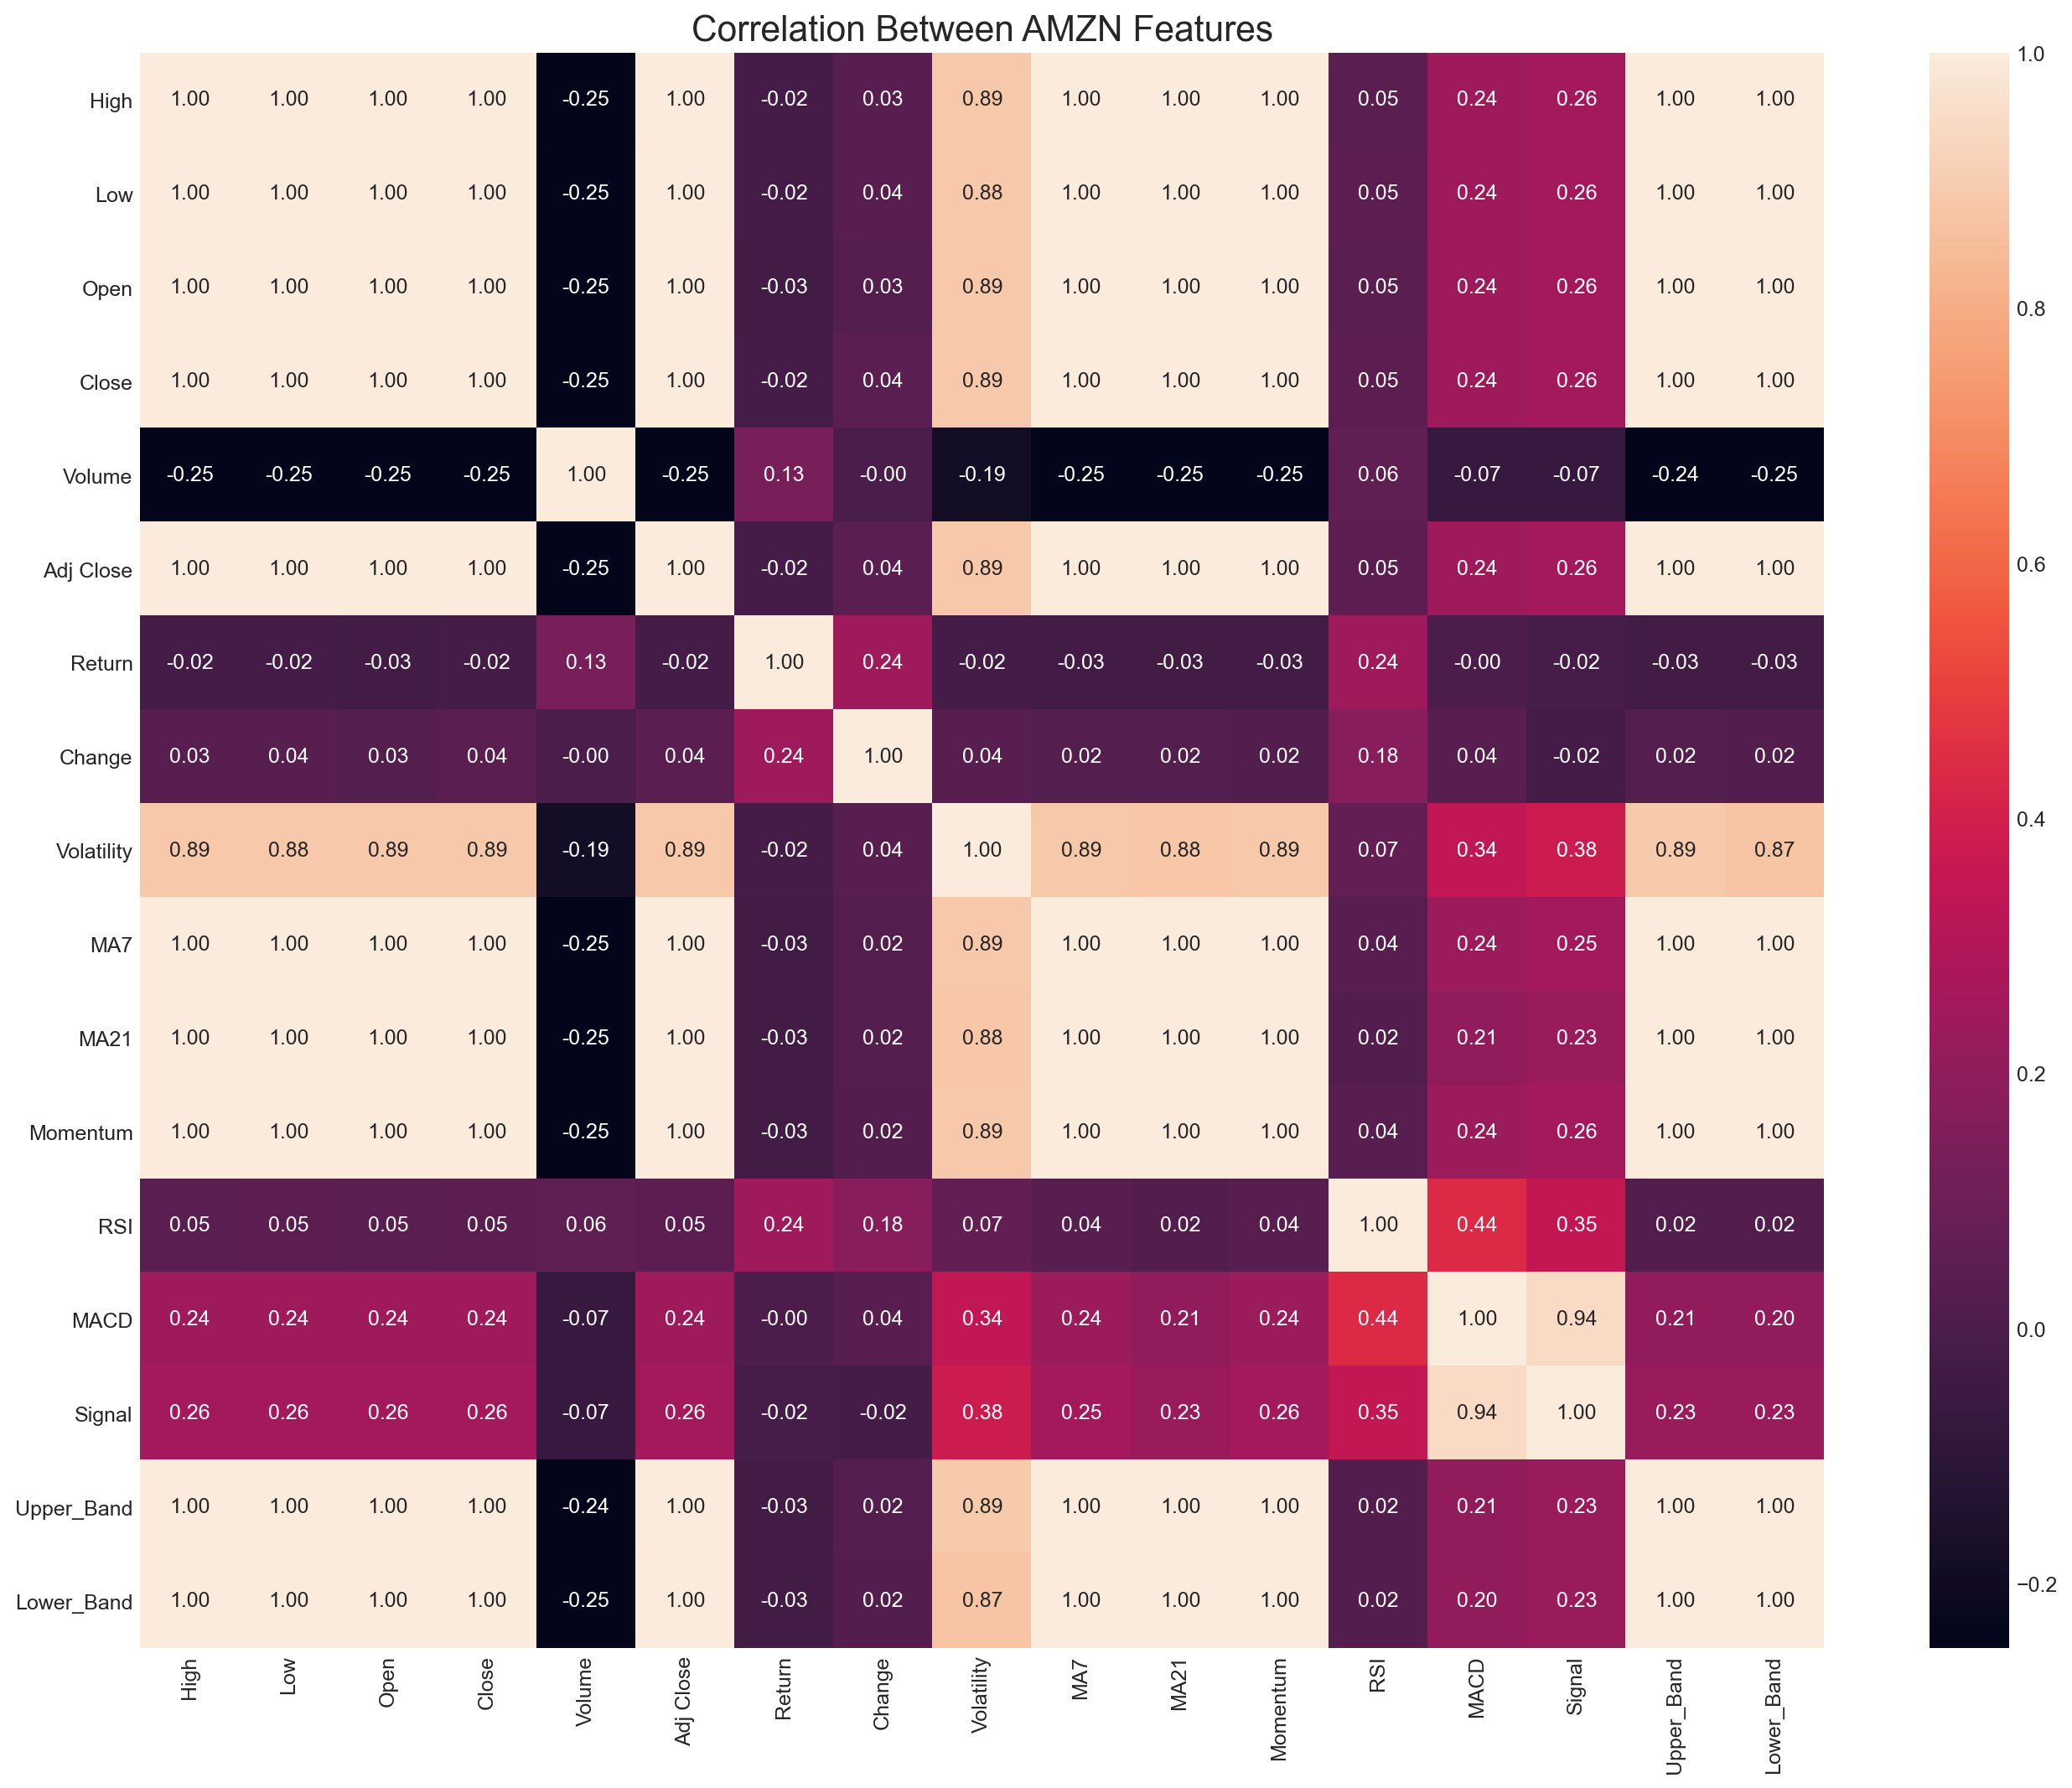

In [32]:
plt.figure(figsize=(18,14))
sns.heatmap(stocks[ticker].corr(), annot=True, fmt='.2f')
plt.ylim(17,0)
plt.title('Correlation Between '+ticker.upper()+' Features', fontSize=17)
plt.show();

---
# Chart Colors
---

In [33]:
Blue = '#3388cf'
Purple = '#ad6eff'
Red = '#ff6e9d'
Green = '#60e8ad'
Dark_Green = '#ffa74a'
Dark_Orange = '#ffbd74'
Light_Orange = '#ffa33f'
Fill_Orange = '#ffa33f'

---
# Bollinger Bands
---

In [34]:
std = 2
xend = dt.date(2020,12,31)
xstart = dt.date(2020,1,1)

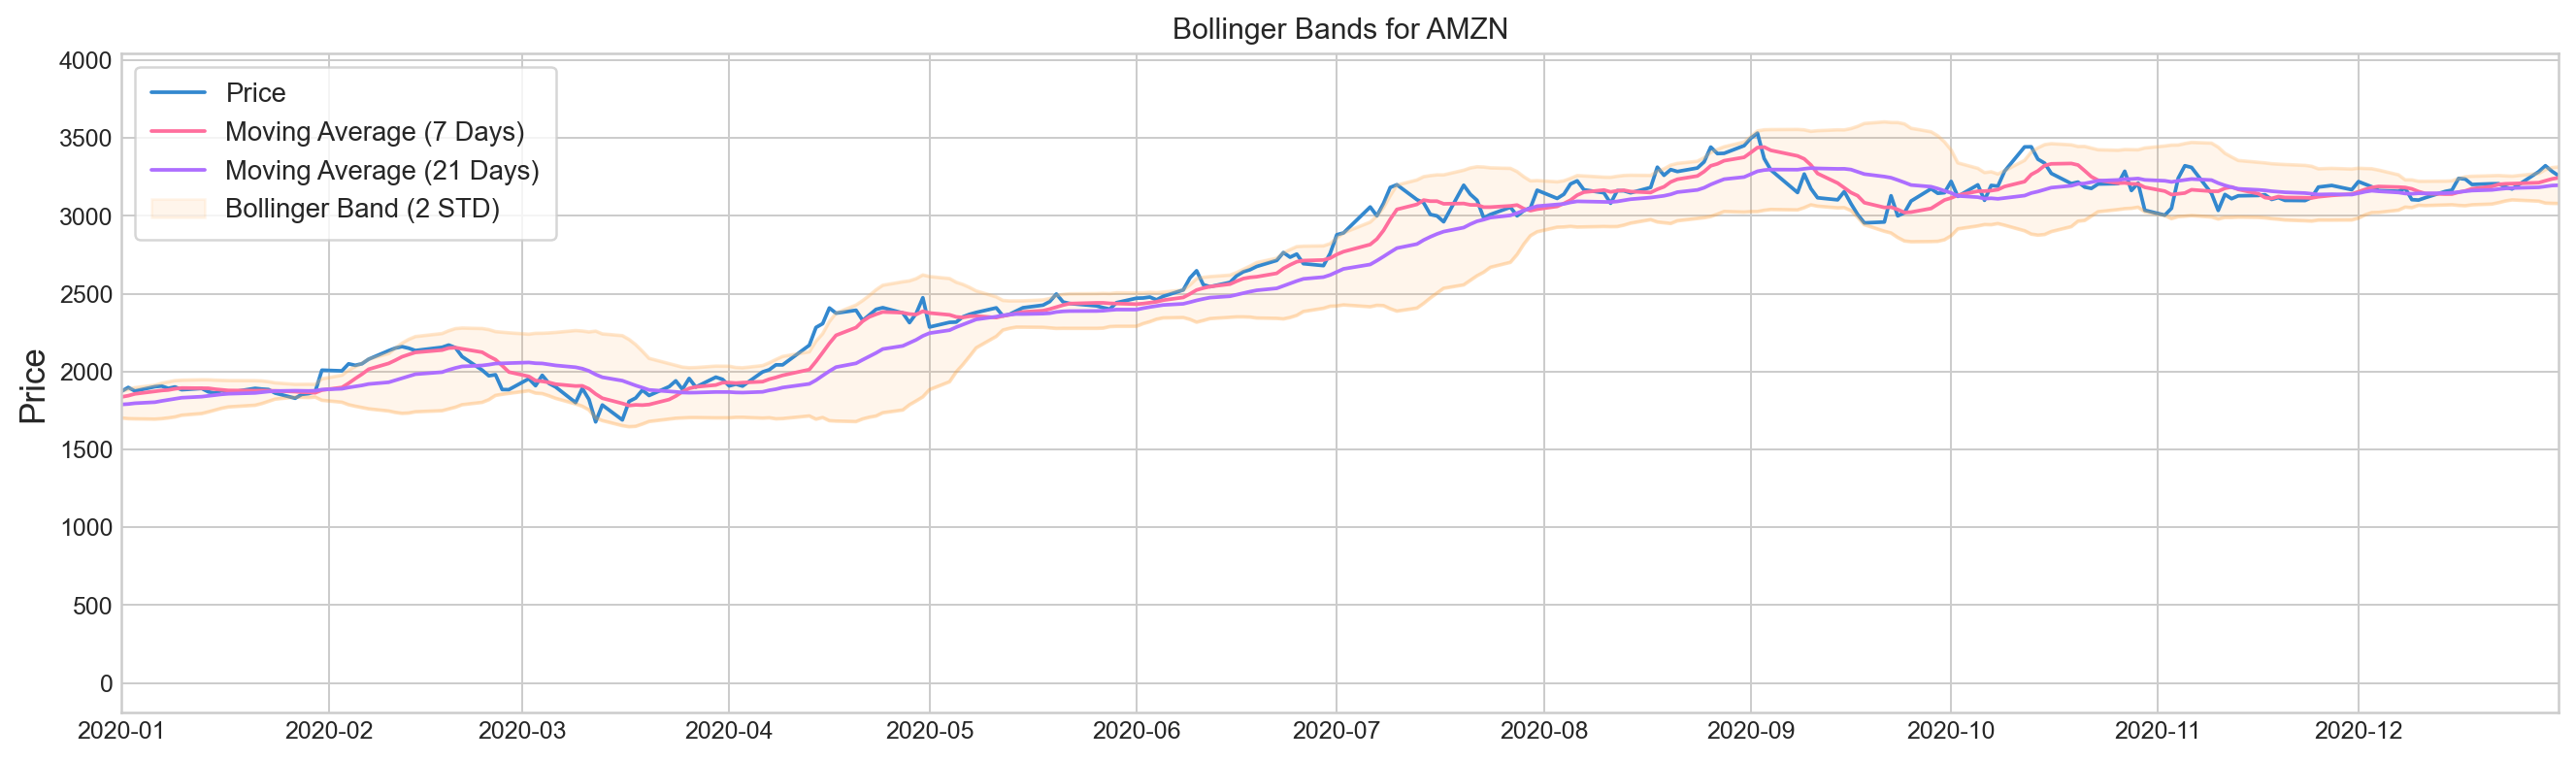

In [35]:
plt.figure(figsize=(18,5))
plt.style.use('seaborn-whitegrid')

plt.plot(stocks[ticker].index, stocks[ticker].Close, color=Blue, label = 'Price')
plt.plot(stocks[ticker].index, stocks[ticker].MA7, color=Red, label = 'Moving Average (7 Days)')
plt.plot(stocks[ticker].index, stocks[ticker].MA21, color=Purple, label = 'Moving Average (21 Days)')

plt.plot(stocks[ticker].index, stocks[ticker].Upper_Band, color=Dark_Orange, alpha=0.3)
plt.plot(stocks[ticker].index, stocks[ticker].Lower_Band, color=Light_Orange, alpha=0.3)
plt.fill_between(stocks[ticker].index, stocks[ticker].Upper_Band, stocks[ticker].Lower_Band, color=Light_Orange, alpha=0.1, label='Bollinger Band ({} STD)'.format(std))

plt.legend(frameon=True,loc=2, ncol=1, fontsize=11, borderpad=.6)
plt.title('Bollinger Bands for '+ticker.upper())
plt.ylabel('Price', fontsize=14)
plt.xlim([xstart,xend])
plt.show();

---
# Relative Strength Index (RSI)
---

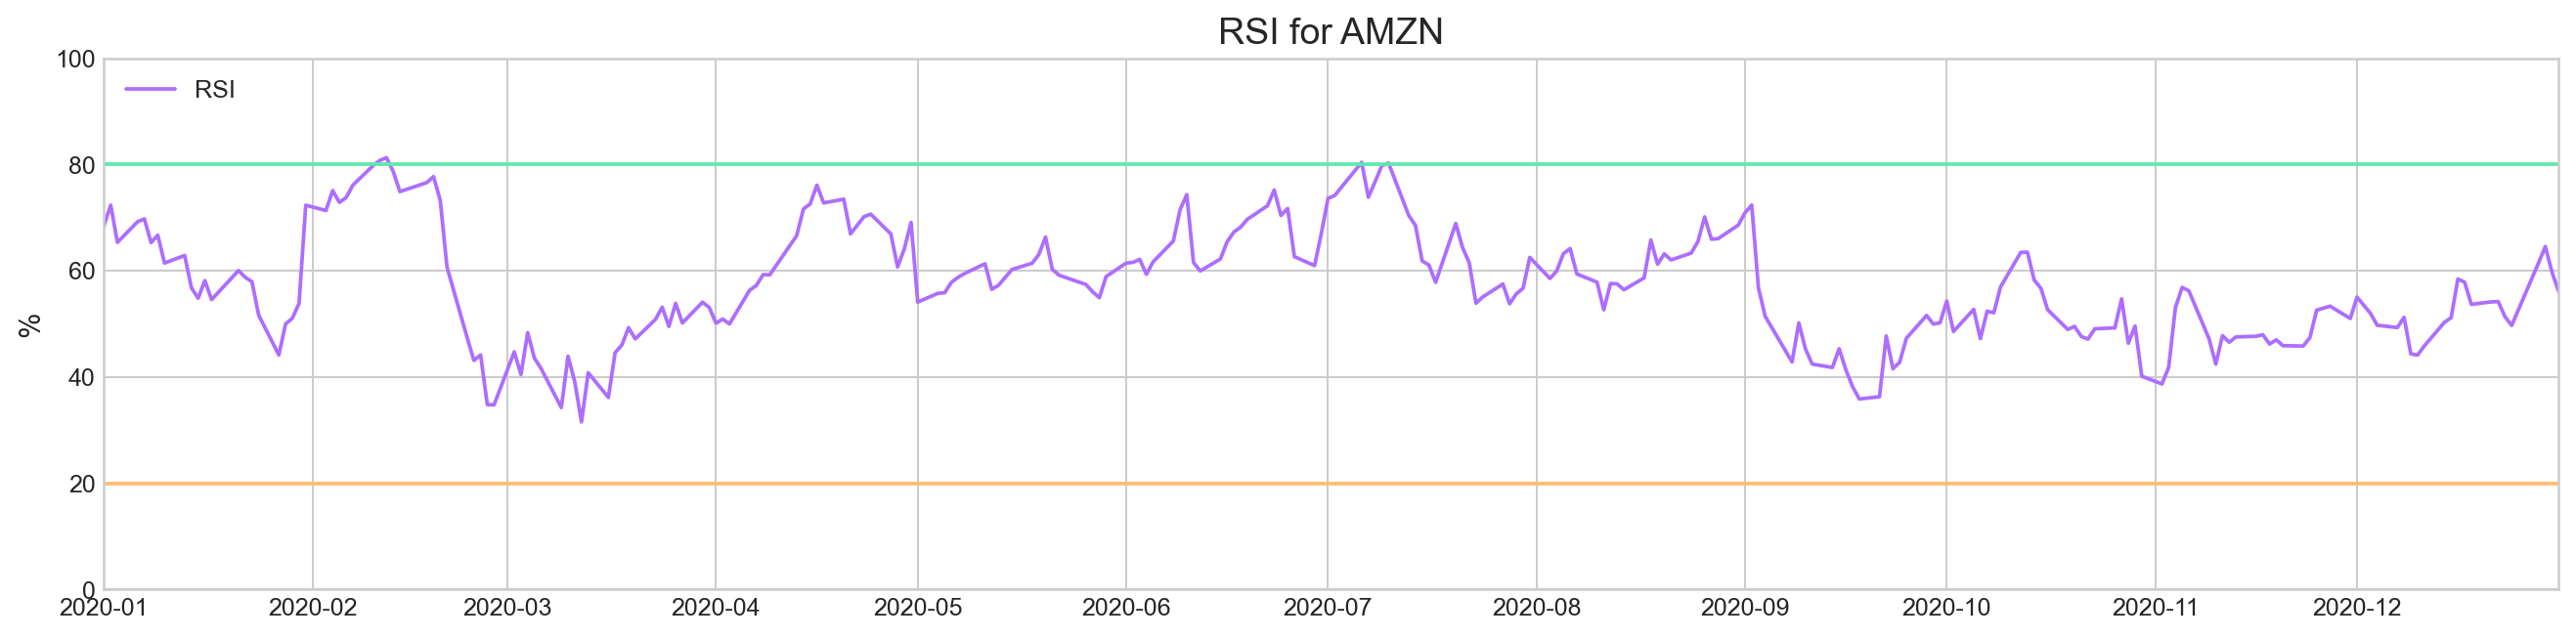

In [36]:
plt.figure(figsize=(18,4))

plt.plot(stocks[ticker].index, stocks[ticker].RSI, color=Purple, label='RSI')

plt.xlim([xstart,xend])
plt.ylim([0,100])
plt.axhline(20, color=Dark_Orange)
plt.axhline(80, color=Green)

plt.legend(loc=2)
plt.title('RSI for '+ticker.upper(),fontsize=15)
plt.ylabel('%', fontsize=12)
plt.show();

---
# Moving Average Convergence/Divergence (MACD)
---

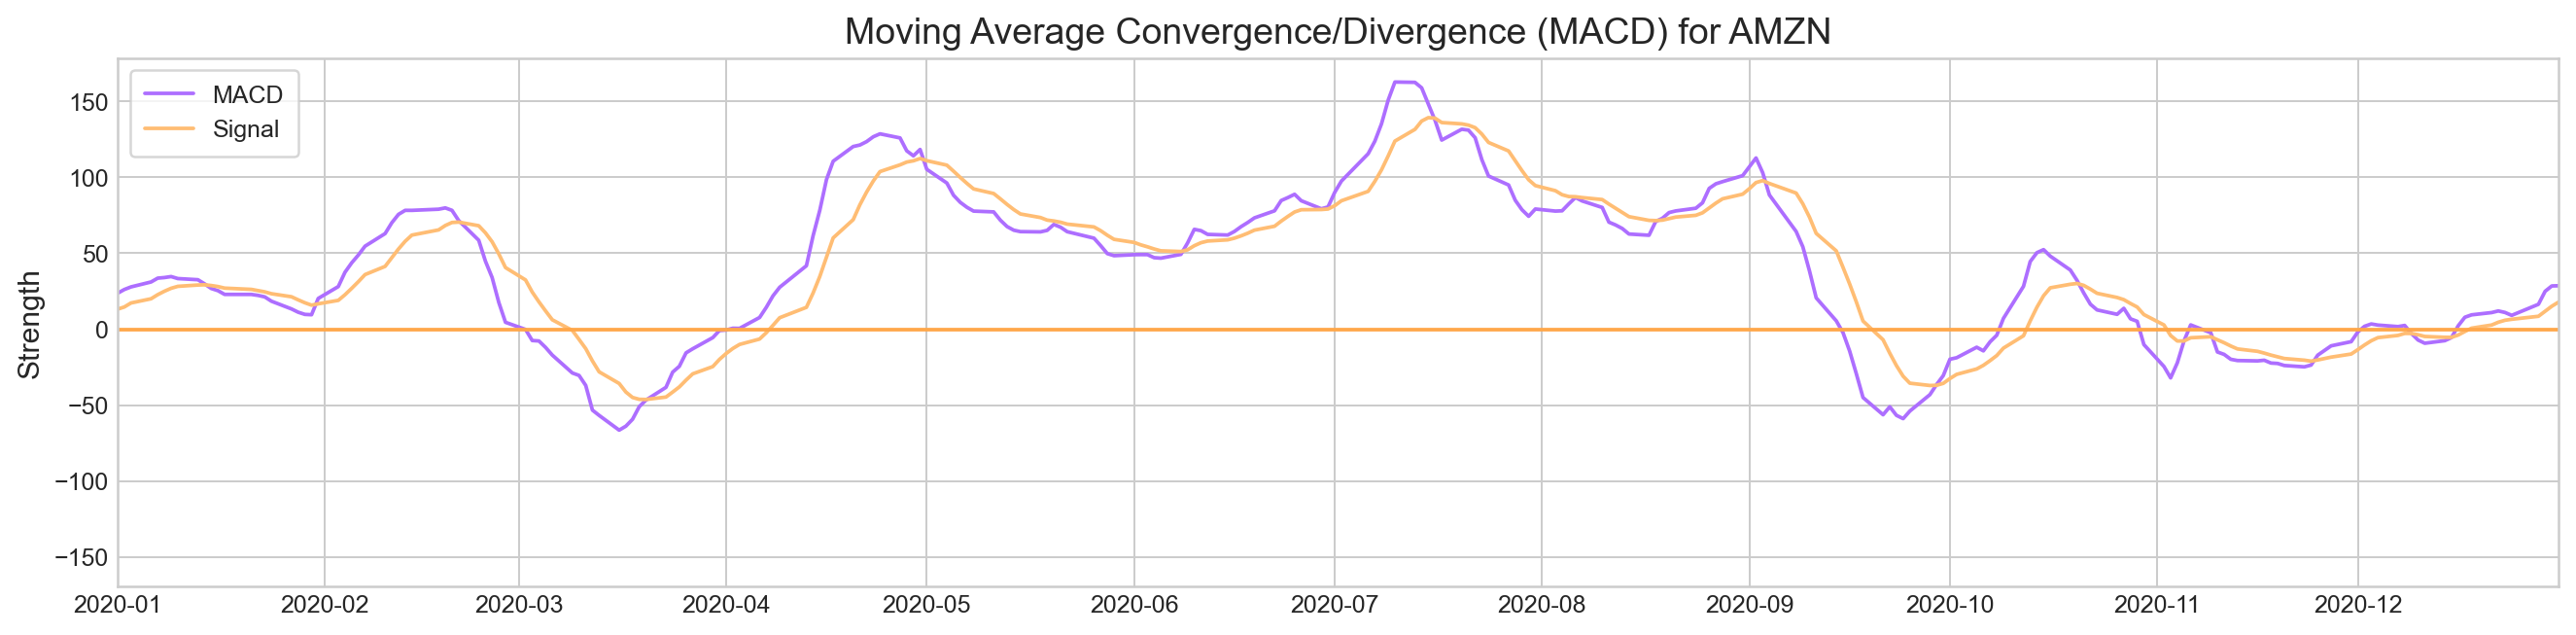

In [37]:
plt.figure(figsize=(18,4))

plt.plot(stocks[ticker].MACD, label="MACD", color=Purple)
plt.plot(stocks[ticker].Signal, label="Signal", color=Dark_Orange)

plt.axhline(0, color=Dark_Green)
plt.xlim([xstart,xend])

plt.legend(frameon=True, loc=2, ncol=1, fontsize=10, borderpad=.6)
plt.ylabel('Strength', fontsize=12)
plt.title("Moving Average Convergence/Divergence (MACD) for "+ticker.upper(), fontsize=15)
plt.show();

---
# Volume
---

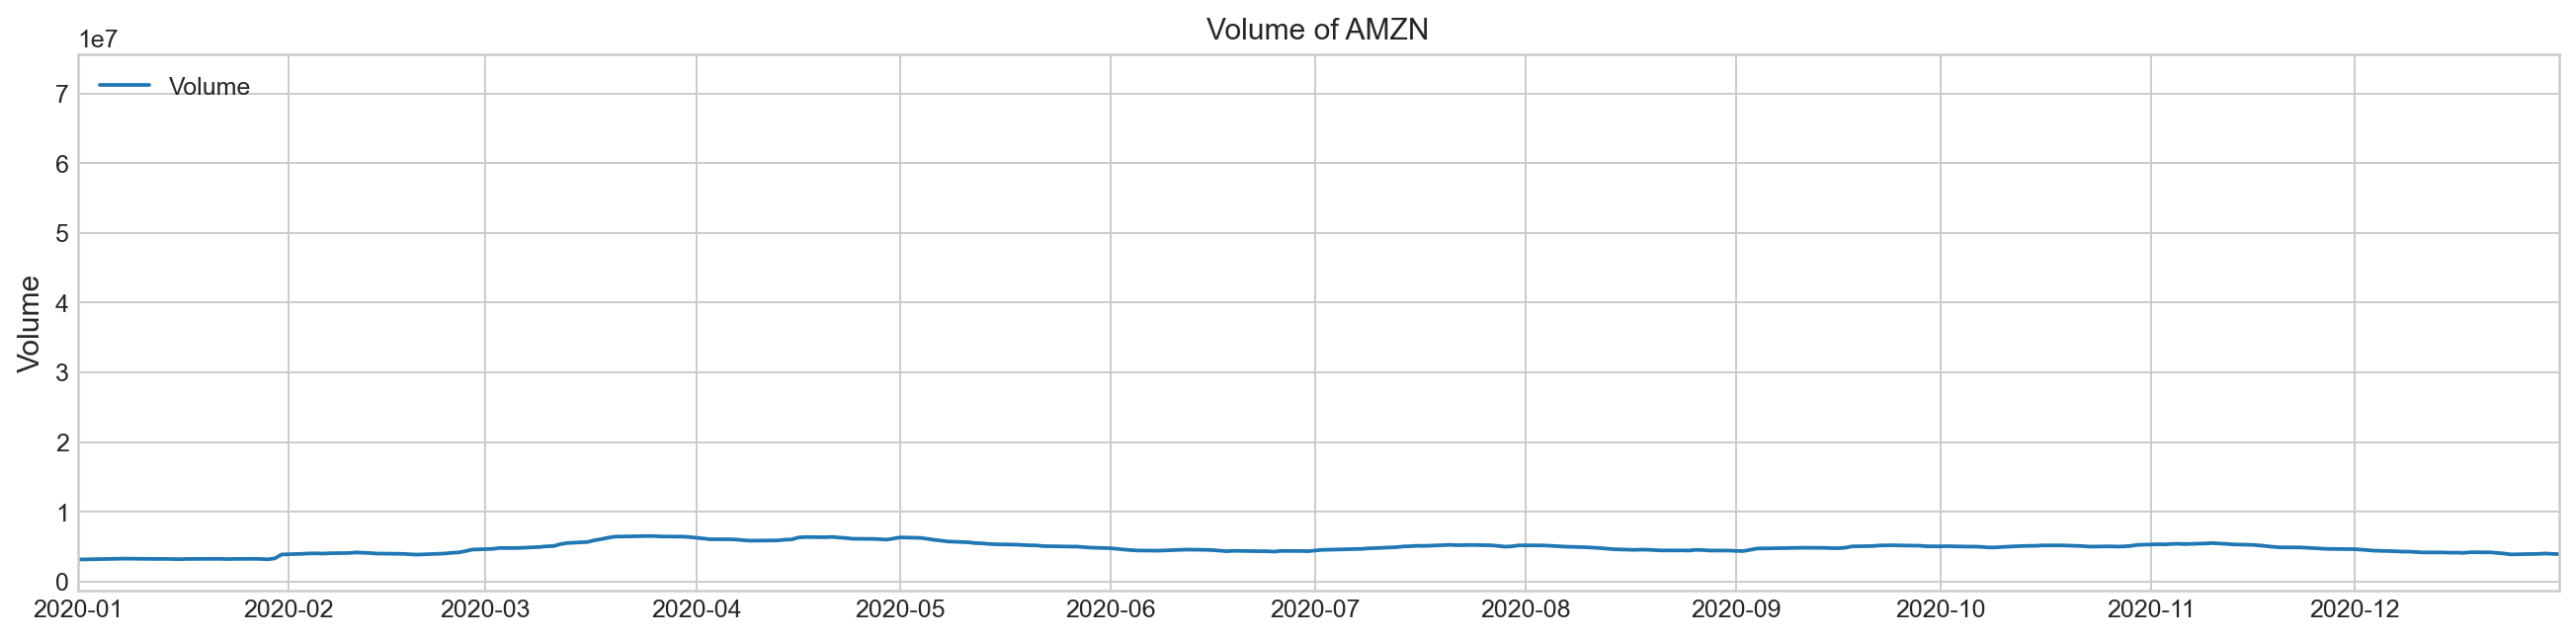

In [38]:
plt.figure(figsize=(18,4))
plt.style.use('seaborn-whitegrid')

plt.plot(stocks[ticker].index, stocks[ticker]['Volume'].ewm(21).mean(), label="Volume")

plt.xlim([xstart,xend])

plt.legend(loc=2)
plt.ylabel('Volume', fontsize=12)
plt.title("Volume of "+ticker.upper())
plt.show();